In [5]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

What does the average revenue look like across ethnicities? Stacked bar chart where the ethnicity is divided into sex to show any difference between male and female owned firms.  

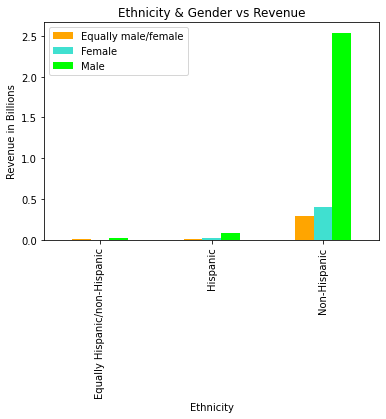

In [41]:
summary = pd.read_csv('data/summary_dataset.csv')

#Extract needed columns
ethnicity_rit_sex = summary[['Ethnicity', 'RevenueInThousands', 'Sex']].copy()

#Rename to show the correct format & multiply revenue by 1000 to get accurate count
ethnicity_rit_sex.rename(columns = {'RevenueInThousands' : 'Revenue'}, inplace = True)
ethnicity_rit_sex['RevenueInBillions'] = summary['RevenueInThousands'] * 1000

#Remove certain rows to show exact data
ethnicity_rit_sex = ethnicity_rit_sex[ethnicity_rit_sex.Ethnicity != 'Total']
ethnicity_rit_sex = ethnicity_rit_sex[ethnicity_rit_sex.Ethnicity != 'Classifiable']
ethnicity_rit_sex = ethnicity_rit_sex[ethnicity_rit_sex.Ethnicity != 'Unclassifiable']
ethnicity_rit_sex = ethnicity_rit_sex[ethnicity_rit_sex.Sex != 'Total']
ethnicity_rit_sex = ethnicity_rit_sex[ethnicity_rit_sex.Ethnicity != 'Classifiable']

#Sort the values and drop null values 
sorted_ethnicity_rit_sex = ethnicity_rit_sex.sort_values(by = 'Revenue').dropna()

#group by and divide the Revenue column by 1,000,000. Unstack the sex column

summed_ethnicity_rit_sex = sorted_ethnicity_rit_sex.groupby(['Ethnicity','Sex'])['Revenue'].mean().div(1000000000).unstack('Sex')

#graph the chart 
graph_ethnicity_rit_sex = summed_ethnicity_rit_sex.plot.bar(title = 'Ethnicity & Gender vs Revenue' , color = ['orange','turquoise','lime'])

#set the y label
graph_ethnicity_rit_sex.set_ylabel('Revenue in Billions')

#fix the legend
graph_ethnicity_rit_sex.legend(['Equally male/female', 'Female', 'Male'], title = '')







What does the firm employee count look like across ethnicities by sex?

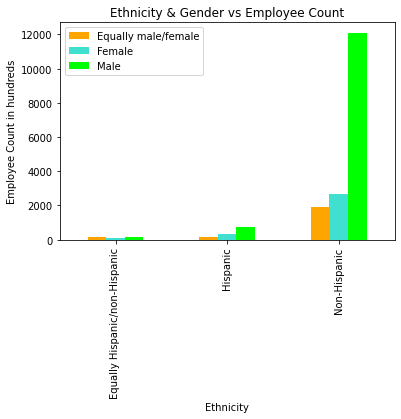

In [42]:
#Extract needed columns
ethnicity_efc_sex = summary[['Ethnicity', 'EmployeeCt', 'Sex']].copy()

#Remove certain rows to show exact data
ethnicity_efc_sex = ethnicity_efc_sex[ethnicity_efc_sex.Ethnicity != 'Total']
ethnicity_efc_sex = ethnicity_efc_sex[ethnicity_efc_sex.Ethnicity != 'Classifiable']
ethnicity_efc_sex = ethnicity_efc_sex[ethnicity_efc_sex.Ethnicity != 'Unclassifiable']
ethnicity_efc_sex = ethnicity_efc_sex[ethnicity_efc_sex.Sex != 'Total']
ethnicity_efc_sex = ethnicity_efc_sex[ethnicity_efc_sex.Ethnicity != 'Classifiable']

#Sort the values and drop null values
sorted_ethnicity_efc_sex = ethnicity_efc_sex.sort_values(by = 'EmployeeCt').dropna()

#Group by and divide the employee count column by 1,000,000. Unstack the sex column 
summed_ethnicity_efc_sex = sorted_ethnicity_efc_sex.groupby(['Ethnicity','Sex']).mean().div(100).unstack('Sex')

#Create chart
graph_ethnicity_efc_sex = summed_ethnicity_efc_sex.plot.bar(title = 'Ethnicity & Gender vs Employee Count' , color = ['orange','turquoise','lime'])

#Set the y label
graph_ethnicity_efc_sex.set_ylabel('Employee Count in hundreds')

#Fix the legend
graph_ethnicity_efc_sex.legend(['Equally male/female', 'Female', 'Male'], title = '')



What is the average employee pay per ethnicity by sex?

Text(0, 0.5, 'Average Pay')

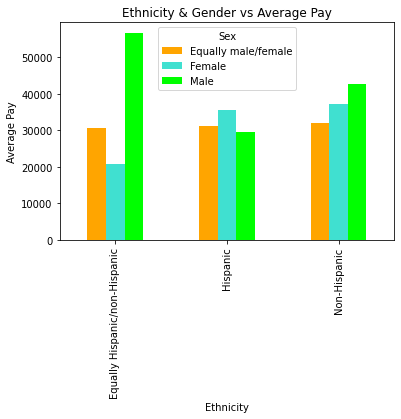

In [40]:
#Extract columns needed
emp_ethnicity_sex_apt = summary[['Ethnicity', 'Sex',]].copy()

#Multiply payroll to get exact number and divide by employee count
emp_ethnicity_sex_apt['Average Pay'] = (summary['AnnualPayrollInThousands'] * 1000) / summary['EmployeeCt']

#Remove certain rows so data is more readable
emp_ethnicity_sex_apt = emp_ethnicity_sex_apt[emp_ethnicity_sex_apt.Sex != 'Total']
emp_ethnicity_sex_apt = emp_ethnicity_sex_apt[emp_ethnicity_sex_apt.Sex != 'Classifiable']
emp_ethnicity_sex_apt = emp_ethnicity_sex_apt[emp_ethnicity_sex_apt.Ethnicity != 'Total']
emp_ethnicity_sex_apt = emp_ethnicity_sex_apt[emp_ethnicity_sex_apt.Ethnicity != 'Unclassifiable']

#drop null values
sorted_emp_ethnicity_sex_apt = emp_ethnicity_sex_apt.sort_values(by = 'Average Pay').dropna(subset = ['Average Pay'])

#group by and gather the mean for each ethnicity divided by sex
summed_emp_ethnicity_sex_apt = sorted_emp_ethnicity_sex_apt.groupby(['Ethnicity','Sex'])['Average Pay'].mean().unstack('Sex')

#Graph it
graph_emp_ethnicity_sex_apt = summed_emp_ethnicity_sex_apt.plot.bar(title = 'Ethnicity & Gender vs Average Pay' , color = ['orange','turquoise','lime'])

#Fix graph
graph_emp_ethnicity_sex_apt.set_ylabel('Average Pay')